In [1]:
import fakenews_utilities as fns
import pandas as pd

###  1. read the data, then clean the data

In [2]:
df = pd.read_csv('tweets_labeled.csv')

In [4]:
df_clean = fns.wash_pandas_str(df)

In [5]:
df_clean.head()

,tweet_id,text,label
0,1161040537207463936,The Endangered Species Act saved the bald eagl...,1
1,1176360756239118342,"Interesting concept -- impeach first, find fac...",1
2,1099036648573145088,#BuildTheWall #DeportThemAll,0
3,1092915693203480577,Why would the MEXICAN GOV’T fund this? Who are...,0
4,1149038450668187654,Sweden Announces Plan To Get 100% Of Energy Fr...,0


### 2.make dataframes of Fake tweets and True tweets sorted by word-containing tweets count  

In [6]:
fake_df = fns.generate_word_df_from_label(df_clean, label=1)
true_df = fns.generate_word_df_from_label(df_clean, label=0)

In [7]:
fake_df.head()
#true_df.head()

,word,containing_twits_in_fake,freq
29,trump,17570,0.244221
40,ukraine,7799,0.108405
8,president,5162,0.071751
211,house,4457,0.061952
107,us,4130,0.057407


### 3. make a dataframe includes word, word's count in true and fake tweets, word frequency in true and fake tweets, frequency different between true and fake tweets, the probability of a tweet be a fake tweet when it contains or not contains a word. 

In [8]:
full_df = fns.generate_word_df_full(df_clean, fake_df, true_df)
full_df.head()

,word,cnt_in_true,cnt_in_fake,freq_in_true,freq_in_fake,freq_diff,with_fake_prob,without_fake_prob
0,trump,12294,17570,0.080111,0.244221,0.164110,0.588334,0.278064
1,ukraine,1,7799,0.000007,0.108405,0.108399,0.999872,0.294773
2,president,2985,5162,0.019451,0.071751,0.052300,0.633607,0.307381
3,house,947,4457,0.006171,0.061952,0.055781,0.824759,0.306753
4,us,6432,4130,0.041913,0.057407,0.015494,0.391024,0.315640


use ipython--pylab in VS can check the high quality word map.

C:\Users\Mushroom\Desktop\FML\AI project\fakenews_utilities.py:136: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:21

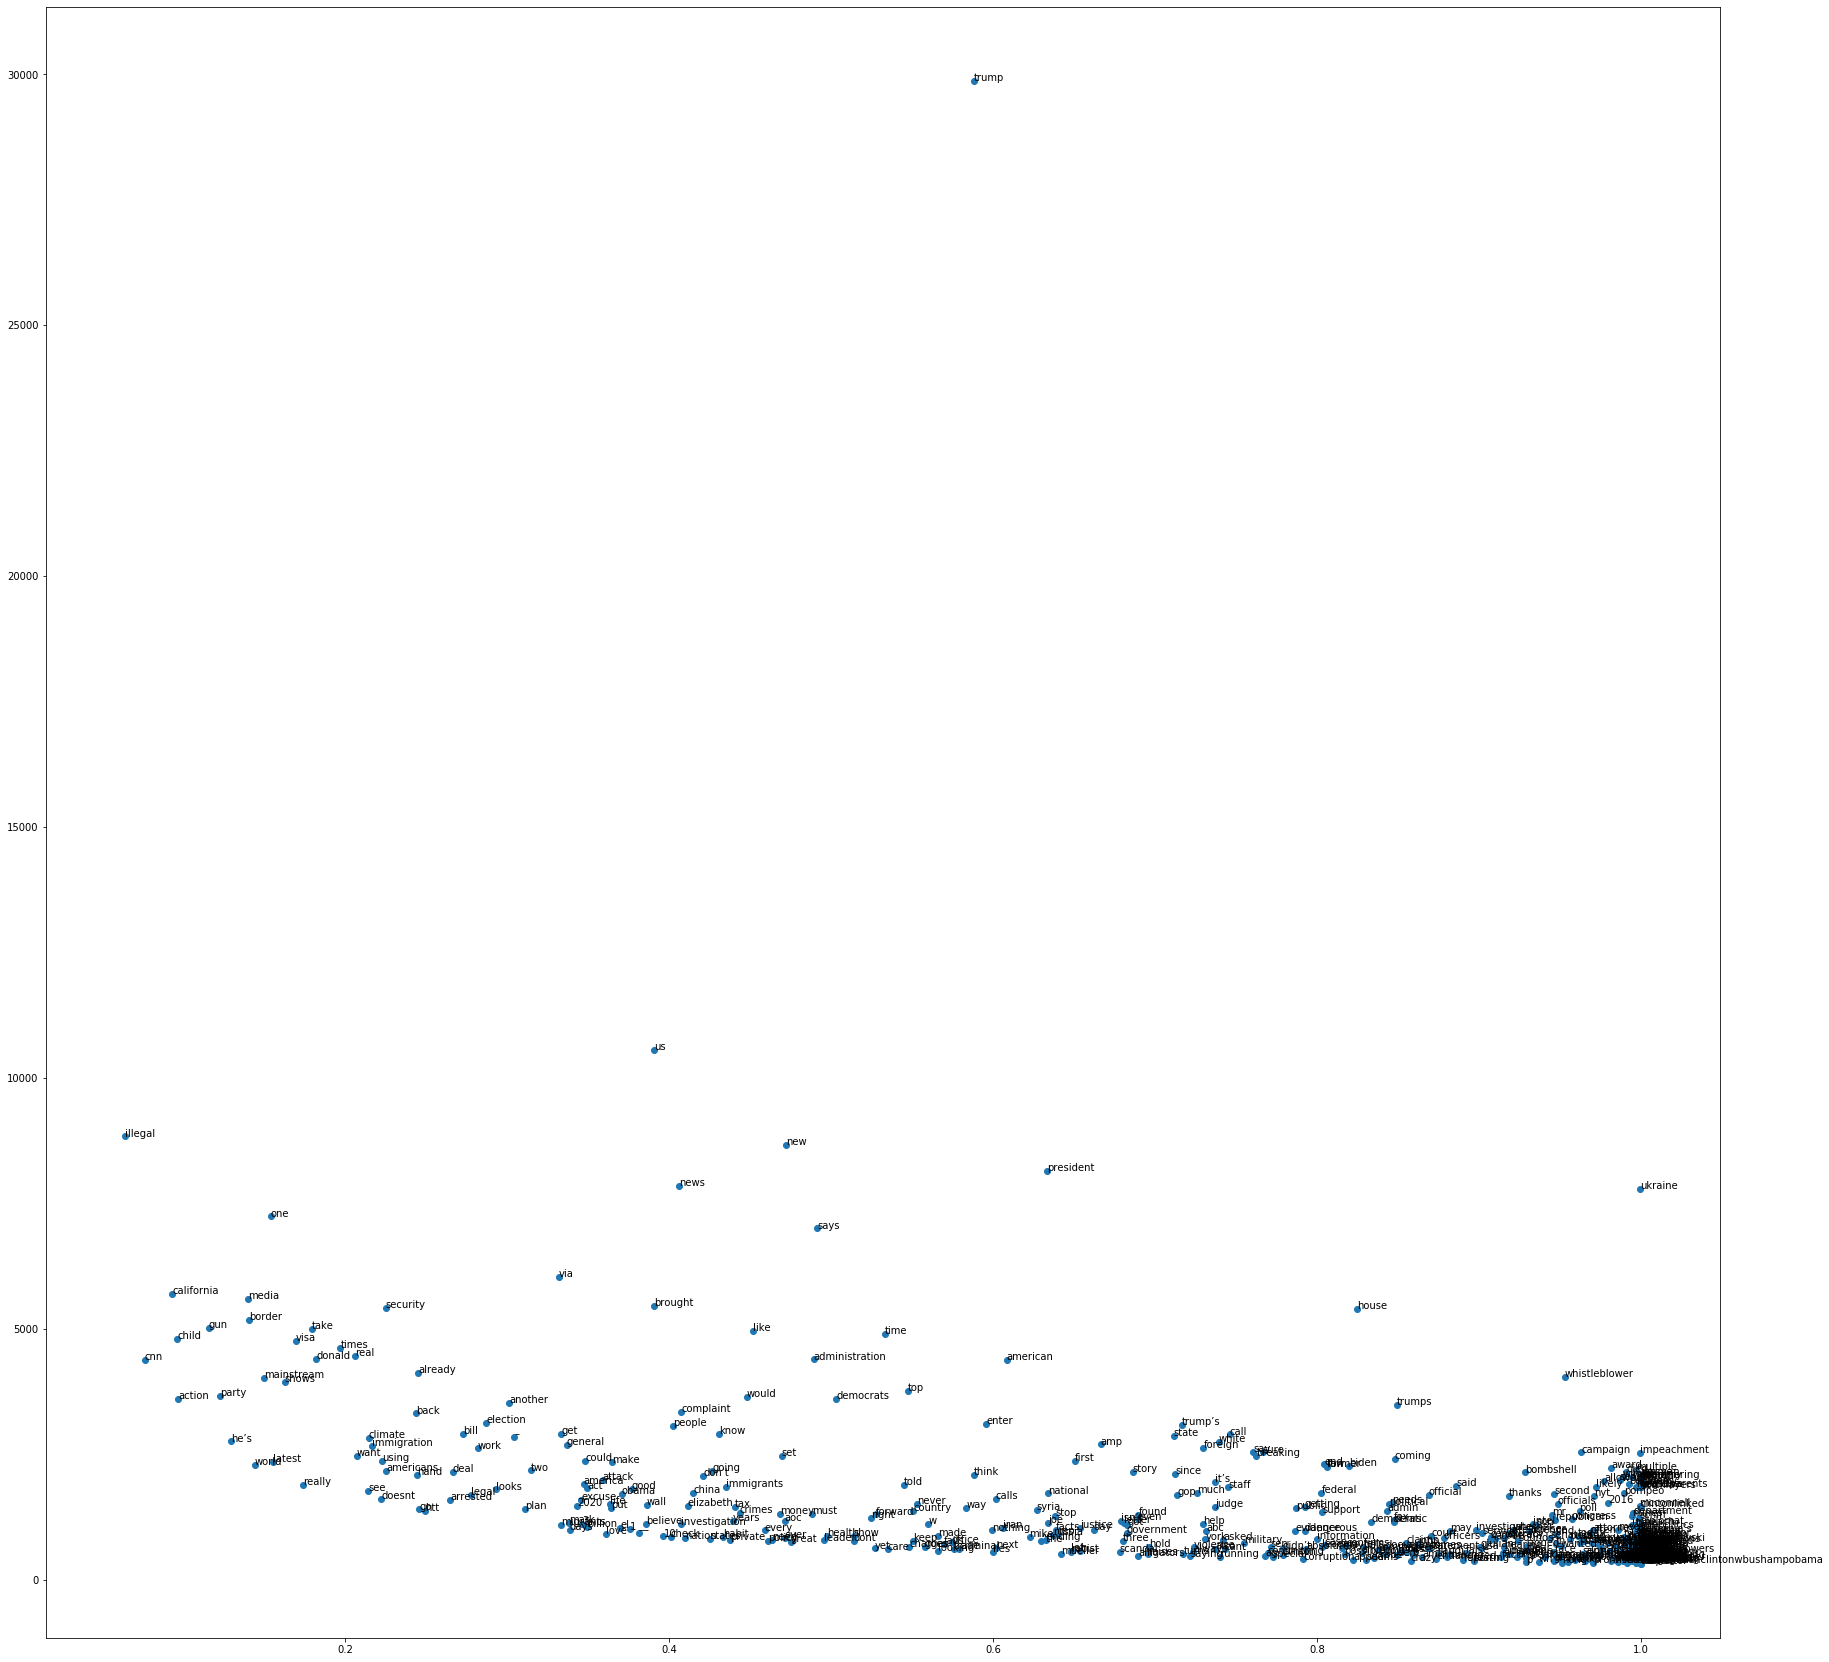

In [9]:
fns.plot_word_map(full_df)